In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
df = pd.read_csv('../input/avocado-prices/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

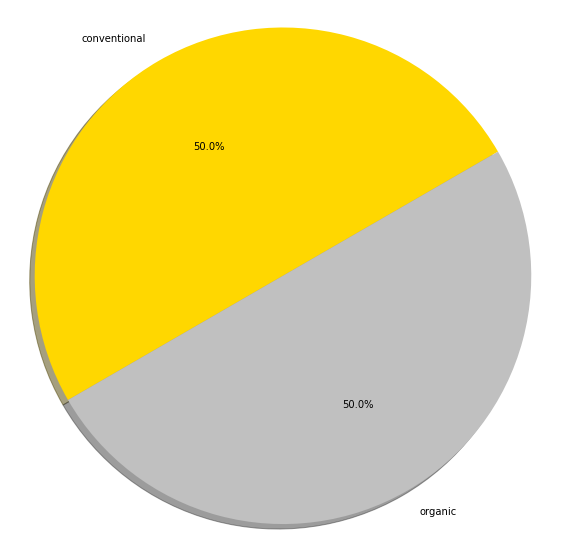

In [6]:
labels = ['conventional', 'organic']

fig, ax = plt.subplots(figsize=(10,10))
colors = ['gold', 'silver']
ax.pie(df['type'].value_counts(),  labels=labels, autopct='%1.1f%%',shadow=True, startangle=30, colors=colors)
#Theme
ax.axis('equal')
plt.show()

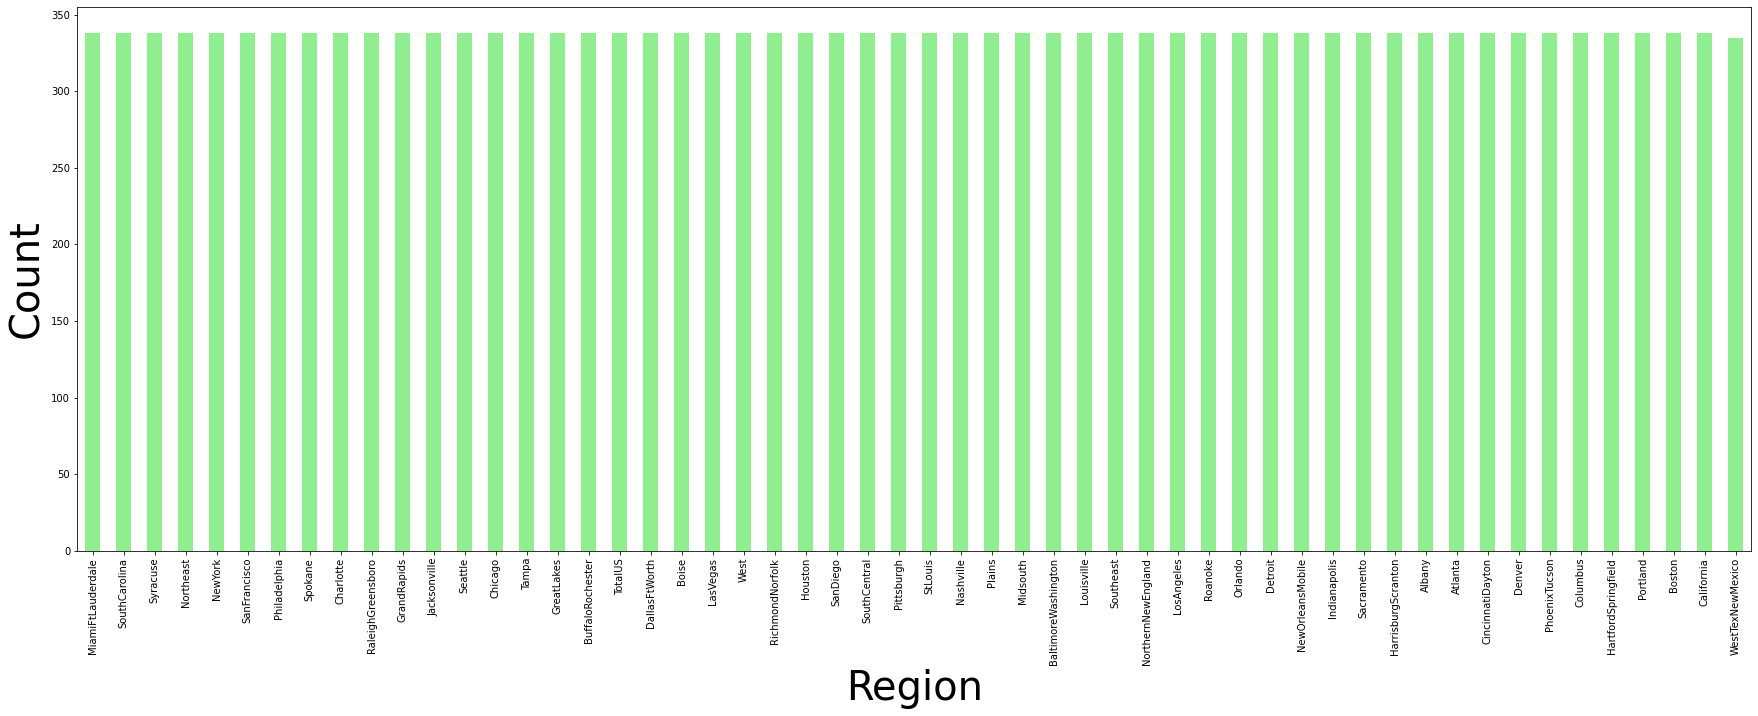

In [7]:
plt.figure(figsize=(30,10))
df['region'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Region', fontsize=40)
plt.ylabel('Count', fontsize=40)
plt.show()

### Data Cleaning

In [8]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [10]:
# Turning object to int
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]  = pd.Categorical(content).codes+1

In [11]:
df.dtypes

Date              int16
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type               int8
year              int64
region             int8
dtype: object

Text(0.5, 1.0, 'Correlation ')

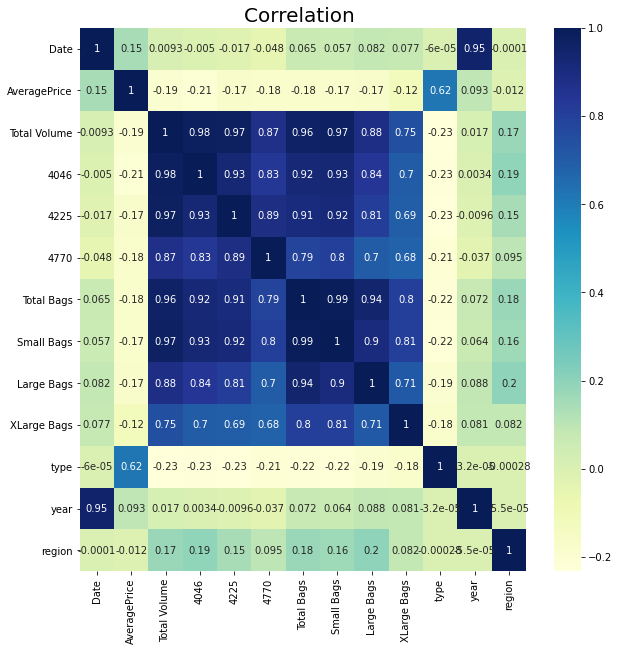

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
           annot=True,
           cmap='YlGnBu')
plt.title('Correlation ', fontsize=20)


## Split the dataset

In [13]:
X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(14599, 3650, 14599, 3650)

In [15]:
#Regressor
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train, y_train)

y_preds = reg.predict(X_test)
y_preds

reg.score(X_test, y_test)


0.9010253889262353

In [16]:
y_preds

array([1.8061, 1.5152, 2.    , ..., 1.719 , 1.2467, 1.6921])

In [17]:
#Gradreint boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(42)

reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

y_preds = reg.predict(X_test)
y_preds

reg.score(X_test, y_test)


0.7651251167352091

In [18]:
#xgboost
from xgboost import XGBRegressor

np.random.seed(42)
reg = XGBRegressor()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

reg.score(X_test,y_test)


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


0.9084605312463399

In [19]:
predictions

array([1.6675628, 1.5377005, 2.0686316, ..., 1.6611226, 1.225138 ,
       1.597041 ], dtype=float32)

In [20]:
len(predictions)

3650